In [2]:
from gb.large import F_air
from gb.constants import Gval, kB, amu, T_air, FM_air, Rsp_air, atm

from IPython.display import Math

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

To use the equations we need the gas constant Rsp. Other things like temperature are fairly trivial

In [3]:
print(f'Book value of Rsp for air: {Rsp_air}')
Rsp = kB / (FM_air * amu)
print(f'Calculated value of Rsp for air: {Rsp}')

Book value of Rsp for air: 287.058
Calculated value of Rsp for air: 287.00249052941723


### Air Pressure Considering Self-Gravitation
In code, we have a function that gives derivatives, and this defines the system. This is from the post:

https://gravitationalballoon.blogspot.com/2013/10/inclusion-of-air-pressure-effects-for.html

I will echo the equations here.

In [4]:
Math(
    r"P'(r) = - \frac{P(r) g(r)}{R_{sp} T }  \\"
    r"g'(r) = \frac{ 4 G \pi }{ R_{sp} T } P(r) - \frac{ 2 g(r) }{ r }"
)

<IPython.core.display.Math object>

In [5]:
# example use of the method:
F_air(0.0, [atm, 0.0])

[-0.0, 1.010334055248568e-09]

In [35]:
N = 200
R_max = 1.0e8
R_values = [i*R_max/N for i in range(N)]

In [36]:
sol = solve_ivp(F_air, [0., R_max], [atm, 0.], dense_output=True)
print(sol)
print(dir(sol))
outer_P = sol.y[0][-1] / atm
print(f'Air pressure at final radius of {R_max} is {outer_P}')

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f23e25e1070>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.69515729e+00, 8.85016645e+00, 4.50638166e+01,
       2.72786480e+02, 1.87597325e+03, 1.37464045e+04, 1.03307832e+05,
       7.95974541e+05, 3.55789086e+06, 1.01578326e+07, 1.99784498e+07,
       2.98181801e+07, 4.26486328e+07, 5.95840158e+07, 7.83822610e+07,
       1.00000000e+08])
 t_events: None
        y: array([[1.01325000e+05, 1.01325000e+05, 1.01325000e+05, 1.01325000e+05,
        1.01325000e+05, 1.01324999e+05, 1.01324962e+05, 1.01322835e+05,
        1.01196605e+05, 9.88082688e+04, 8.33997050e+04, 5.28758370e+04,
        3.04918367e+04, 1.51995007e+04, 6.94220936e+03, 3.50477317e+03,
        1.90380367e+03],
       [0.00000000e+00, 1.86332712e-10, 2.84013359e-09, 1.51286849e-08,
        9.18421299e-08, 6.31766053e-07, 

In [37]:
y_values = sol.sol(R_values)

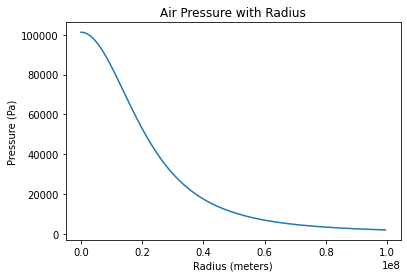

In [38]:
plt.plot(R_values, y_values[0])
plt.xlabel('Radius (meters)')
plt.ylabel('Pressure (Pa)')
plt.title('Air Pressure with Radius')
plt.show()

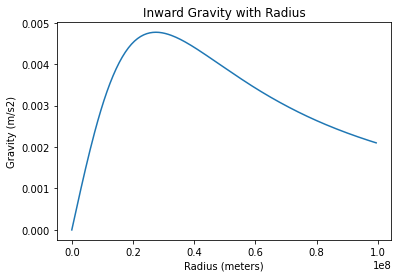

In [39]:
plt.plot(R_values, y_values[1])
plt.xlabel('Radius (meters)')
plt.ylabel('Gravity (m/s2)')
plt.title('Inward Gravity with Radius')
plt.show()

### Large Balloon Stability
Revisiting constructs from the post:

https://gravitationalballoon.blogspot.com/2013/12/the-specific-stability-requirement-of.html

It would be very interesting to have a ratio of the derivative to the absolute value for both P and g.

In [40]:
P_values = y_values[0]
g_values = y_values[1]

In [41]:
R_values2 = [0.5*(R_values[i] + R_values[i + 1]) for i in range(N-1)]

In [42]:
delta_r = R_max/N
dPdr = [(P_values[i + 1] - P_values[i]) / (delta_r * P_values[i + 1]) for i in range(N-1)]
dgdr = [(g_values[i + 1] - g_values[i]) / (delta_r * g_values[i + 1]) for i in range(N-1)]

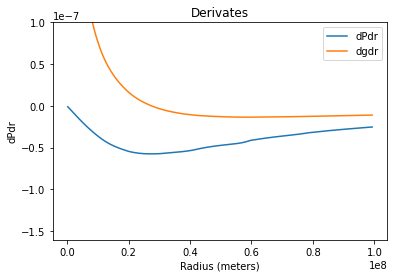

In [43]:
plt.plot(R_values2, [[dPdr[i], dgdr[i]] for i in range(N-1)])
plt.xlabel('Radius (meters)')
plt.ylabel('dPdr')
plt.title('Derivates')
plt.legend(['dPdr', 'dgdr'])
plt.ylim(top=0.1e-6)
plt.show()